In [1]:
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import *
import seaborn as sns

tex_fonts = {
    # Use LaTeX to write all text
    # "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
}

# sns.set_theme(
#     # context="talk",
#     context="paper",
#     # rc={"figure.figsize": (8, 6)},
#     # palette="colorblind6",
#     style="whitegrid",
#     rc=tex_fonts,
# )

data = {
    0.25: load_data('../stats/fpm_6_x0.25.json'),
    0.5: load_data('../stats/fpm_6_x0.5.json'),
    1: load_data('../stats/fpm_6_x1.json'),
    2: load_data('../stats/fpm_6_x2.json'),
    3: load_data('../stats/fpm_6_x3.json'),
}

# data = {
#     0.25: load_data('../stats/fpm_6_x0.25_dTPFA.json'),
#     0.5: load_data('../stats/fpm_6_x0.5_dTPFA.json'),
#     1: load_data('../stats/fpm_6_x1_dTPFA.json'),
#     2: load_data('../stats/fpm_6_x2_dTPFA.json'),
#     3: load_data('../stats/fpm_6_x3_dTPFA.json'),
# }

ax_names = {
    0.25: "Cell size: h / 0.25",
    0.5: "Cell size: h / 0.5",
    1: "Cell size: h",
    2: "Cell size: h / 2",
    3: "Cell size: h / 3",
    4: "Cell size: h / 4",
    5: "Cell size: h / 5",
    6: "Cell size: h / 6",
}

save_path = "../figures/fpm_6_3D_"

/home/porepy/porepy/src/porepy/numerics/nonlinear/nonlinear_solvers.py:14: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import trange  # type: ignore


In [2]:
shape = [3, 2]
figsize = (12, 6)

Text(0.5, 0.98, '3D, 3 fractures')

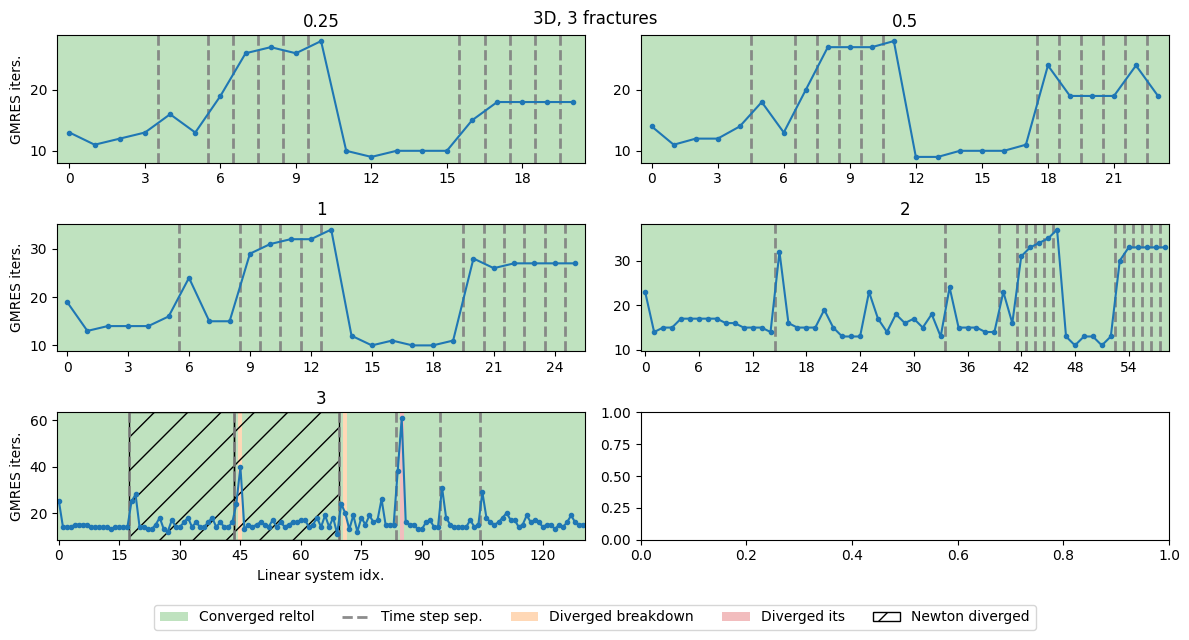

In [3]:
def render_element(entry: Sequence[TimeStepStats]):
    color_converged_reason(entry)
    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    plt.plot(get_gmres_iterations(entry), marker='.')

plot_grid(data, render_element, shape=shape, figsize=figsize, legend=True)
plt.suptitle('3D, 3 fractures')

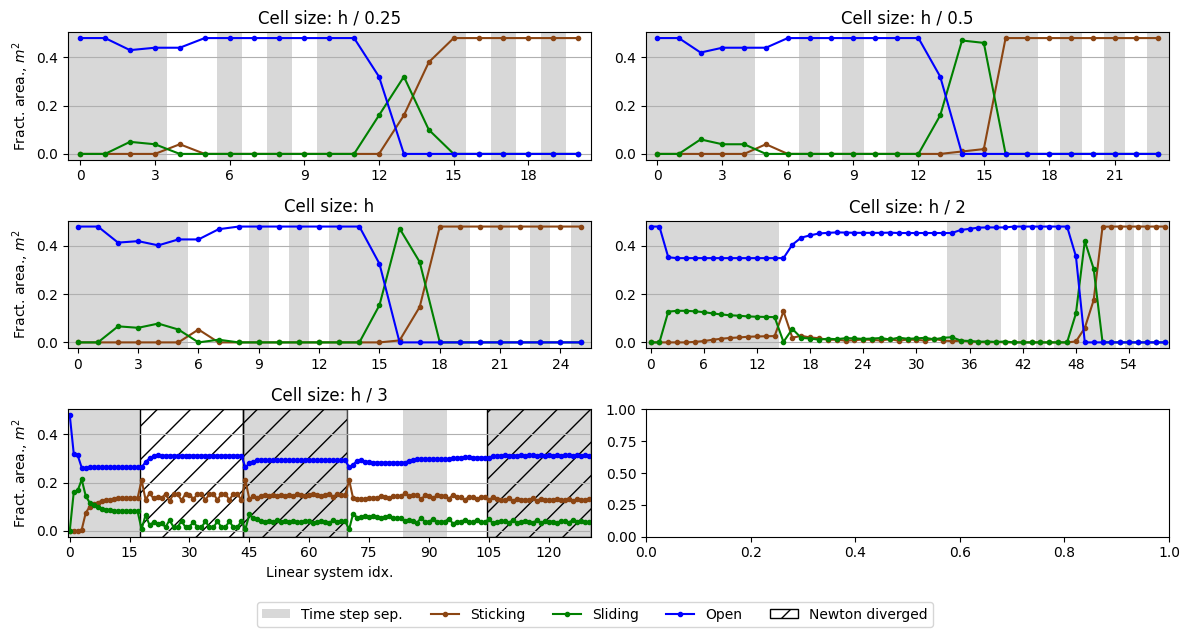

In [4]:
def render_element(i: int, entry: Sequence[TimeStepStats]):
    st, sl, op, tr = get_volume_sticking_sliding_open_transition(
        entry, dofs_info_path="../stats/dofs_info_fpm_6_3d.json", cell_size_multiplier=i
    )
    color_time_steps(entry, fill=True, grid=False, legend=True)
    plt.gca().grid(False)
    plt.gca().grid(True, which='major', axis='y')
    plt.plot(st, label="Sticking", marker=".", color=COLOR_STICKING)
    plt.plot(sl, label="Sliding", marker=".", color=COLOR_SLIDING)
    plt.plot(op, label="Open", marker=".", color=COLOR_OPEN)
    # plt.plot(tr, label="Transition", marker=".", color=COLOR_TRANSITION)


plot_grid(data, render_element, shape=shape, figsize=figsize, ylabel="Fract. area., $m^2$", ax_titles=ax_names)
# plt.savefig(save_path + 'fracture_length.pdf', bbox_inches='tight')

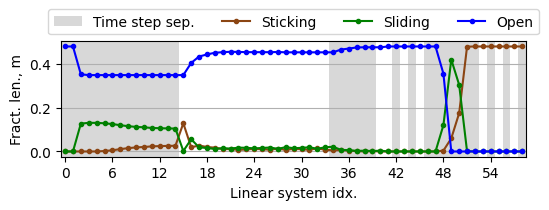

In [5]:
plt.figure(figsize=(6, 1.5))
render_element(i=2, entry=data[2])
plt.ylabel("Fract. len., m")
plt.xlabel("Linear system idx.")
plt.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=5,
    fancybox=True,
)
plt.savefig(save_path + 'fracture_length.pdf', bbox_inches='tight')

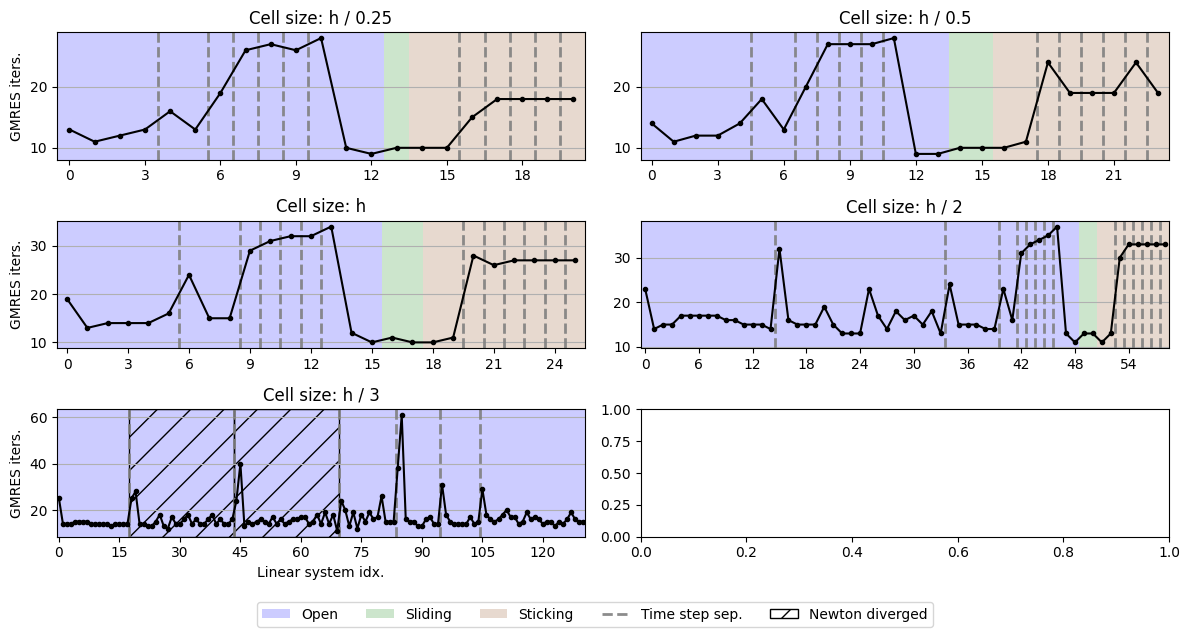

In [6]:
def render_element(entry: Sequence[TimeStepStats]):
    color_sticking_sliding_open_transition(entry)
    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    plt.gca().grid(True, which='major', axis='y')
    plt.plot(get_gmres_iterations(entry), marker=".", color="black")



axes = plot_grid(data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=ax_names)

plt.savefig(save_path + 'gmres_fracture_state.pdf', bbox_inches='tight')

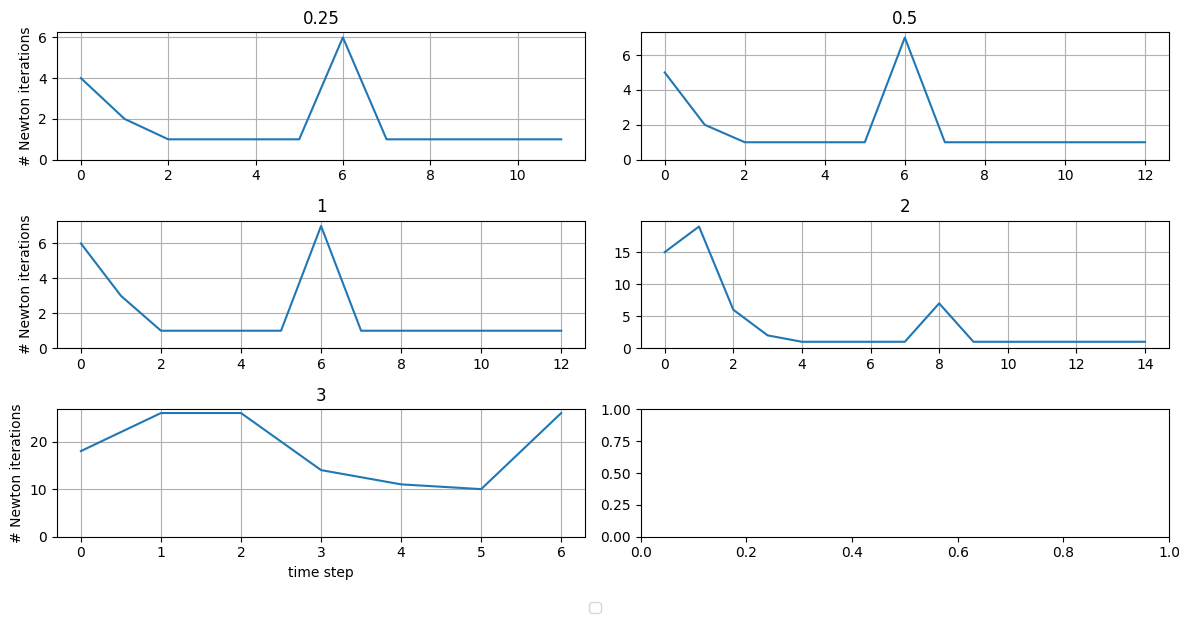

In [7]:
def render_element(entry: Sequence[TimeStepStats]):
    plt.plot(get_newton_iterations(entry))
    plt.ylim(bottom=0)
    plt.grid()

plot_grid(data, render_element, shape=shape, figsize=figsize, ylabel='# Newton iterations', xlabel='time step')

# Testing bad matrix

In [8]:
assert False

AssertionError: 

In [15]:
from fpm_6 import make_model

cell_size_multiplier = 0.5
model = make_model(cell_size_multiplier)
model.prepare_simulation()
model.before_nonlinear_loop()
model.before_nonlinear_iteration()
model._initialize_solver()

cell_size_multiplier = 0.5


num sticking: 0
num sliding: 0
num open: 0
num trans: 48


In [16]:
mat_idx = 20
entry = data[cell_size_multiplier]
print(get_gmres_iterations(entry)[mat_idx])
mat, rhs, state, iterate, dt = load_matrix_rhs_state_iterate_dt(entry, mat_idx)

19


In [17]:
model.linear_system = mat, rhs
model.equation_system.set_variable_values(iterate, iterate_index=0)
model.equation_system.set_variable_values(state, time_step_index=0)  # 1

model.ad_time_step.set_value(dt)
st, sl, op, tr = model.sticking_sliding_open_transition()
print(sum(st))
print(sum(sl))
print(sum(op))
print(sum(tr))

48
0
0
0


/home/porepy/.local/lib/python3.11/site-packages/scipy/sparse/_index.py:134: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


Solve  took: 0.11
True residual permuted: 8.174894135466418e-07
True residual: 1.0453746227215669e-06
PETSc Converged Reason: 2


{'mat_Q': BlockMatrixStorage of shape (3857, 3857) with 911669 elements with 6x6 active groups,
 'rhs_Q': array([-5.17381277e-15, -0.00000000e+00, -0.00000000e+00, ...,
        -1.93802474e-14, -1.62391430e-14, -1.10366444e-16]),
 'prec': <mat_utils.FieldSplit at 0x78f327517090>}

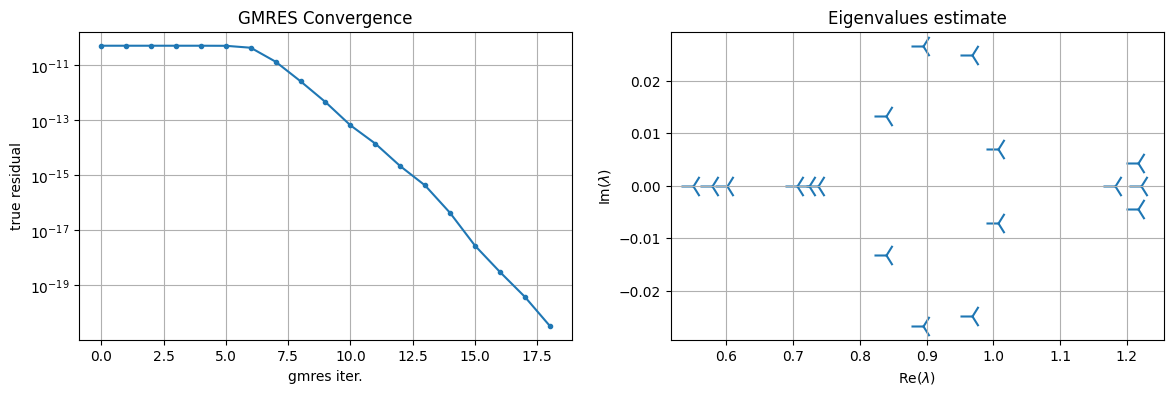

In [24]:
sol = None
schema = model._prepare_solver()
solve_petsc_new(
    model.bmat,
    schema,
    rhs_global=rhs,
    # Qleft=model.Qleft,
    Qright=model.Qright,
    pc_side="right",
    tol=1e-10,
)

In [ ]:
sol = None
schema = model._prepare_solver()
solve_petsc_new(
    model.bmat,
    schema,
    rhs_global=rhs,
    # Qleft=model.Qleft,
    Qright=model.Qright,
    pc_side="right",
    tol=1e-10,
)